# Imports

In [56]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN
import matplotlib.pyplot as plt
import tensorflow as tf

# Read Data

In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [3]:
train_df = pd.read_csv('/content/drive/My Drive/nlp hw/train.csv')
test_df = pd.read_csv('/content/drive/My Drive/nlp hw/test.csv')

# Create Dataset
Using numpy sliding window function to create 20 consecutive days data windows.

In [30]:
timesteps_n = 20
train_x = np.lib.stride_tricks.sliding_window_view(train_df["value"].to_numpy(), timesteps_n)[:-1]#.reshape((1, timesteps_n, -1))
train_x = np.expand_dims(train_x, 1)
train_y = train_df["value"].to_numpy()[20:]

test_x = np.lib.stride_tricks.sliding_window_view(test_df["value"].to_numpy(), timesteps_n)[:-1]#.reshape((1, timesteps_n, -1))
test_x = np.expand_dims(test_x, 1)
test_y = test_df["value"].to_numpy()[20:]

print(f"Data shape: train x {train_x.shape}, y {train_y.shape}")
print(f"Data shape: test x {test_x.shape}, y {test_y.shape}")

Data shape: train x (980, 1, 20), y (980,)
Data shape: test x (441, 1, 20), y (441,)


# Create the model

In [84]:
model = Sequential()
model.add(SimpleRNN(units=16, input_shape=(1,timesteps_n), activation="relu"))
model.add(Dense(8, activation="relu")) 
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='rmsprop')
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_13 (SimpleRNN)   (None, 16)                592       
                                                                 
 dense_28 (Dense)            (None, 8)                 136       
                                                                 
 dense_29 (Dense)            (None, 1)                 9         
                                                                 
Total params: 737
Trainable params: 737
Non-trainable params: 0
_________________________________________________________________


# Train

In [85]:
model.fit(train_x, train_y, validation_data=(test_x, test_y), epochs=200, batch_size=64, verbose=2)

Epoch 1/200
16/16 - 2s - loss: 922.2952 - val_loss: 164.4411 - 2s/epoch - 94ms/step
Epoch 2/200
16/16 - 0s - loss: 124.7333 - val_loss: 125.1985 - 70ms/epoch - 4ms/step
Epoch 3/200
16/16 - 0s - loss: 118.0050 - val_loss: 147.3993 - 67ms/epoch - 4ms/step
Epoch 4/200
16/16 - 0s - loss: 110.5401 - val_loss: 129.4906 - 52ms/epoch - 3ms/step
Epoch 5/200
16/16 - 0s - loss: 89.0264 - val_loss: 113.3038 - 56ms/epoch - 4ms/step
Epoch 6/200
16/16 - 0s - loss: 80.1672 - val_loss: 115.1271 - 69ms/epoch - 4ms/step
Epoch 7/200
16/16 - 0s - loss: 74.9991 - val_loss: 72.4019 - 55ms/epoch - 3ms/step
Epoch 8/200
16/16 - 0s - loss: 68.9474 - val_loss: 67.5819 - 62ms/epoch - 4ms/step
Epoch 9/200
16/16 - 0s - loss: 64.0745 - val_loss: 118.7431 - 66ms/epoch - 4ms/step
Epoch 10/200
16/16 - 0s - loss: 60.5542 - val_loss: 61.9427 - 67ms/epoch - 4ms/step
Epoch 11/200
16/16 - 0s - loss: 60.6364 - val_loss: 70.5085 - 53ms/epoch - 3ms/step
Epoch 12/200
16/16 - 0s - loss: 57.3579 - val_loss: 68.6880 - 56ms/epoch - 

# Predict and Evaluate

In [90]:
mse = model.evaluate(test_x, test_y, batch_size=64, verbose=2)
pred = model.predict(test_x, batch_size=64, verbose=0)

7/7 - 0s - loss: 47.3192 - 34ms/epoch - 5ms/step


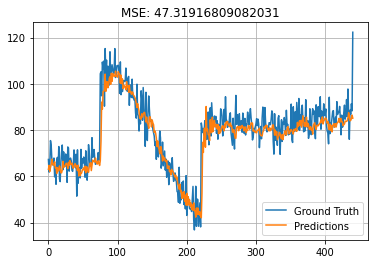

In [94]:
plt.plot(np.arange(len(test_y)), test_y, label='Ground Truth')
plt.plot(np.arange(len(pred)), pred, label='Predictions')
plt.legend(loc="lower right")
plt.grid()
plt.title(f"MSE: {mse}")
plt.show()